In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
## Importing Dataset

In [4]:

anime_data=pd.read_csv('anime.csv')
rating_data=pd.read_csv('rating.csv')

print ("The shape of the  data is (row, column):"+ str(anime_data.shape))
print (anime_data.info())

print ("The shape of the  data is (row, column):"+ str(rating_data.shape))
print (rating_data.info())

The shape of the  data is (row, column):(12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None
The shape of the  data is (row, column):(7813737, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


In [5]:
# #We are merging our csv's based on anime_id from both datasets and later we are renaming the columns
anime_fulldata=pd.merge(anime_data,rating_data,on='anime_id',suffixes= ['', '_user'])
anime_fulldata = anime_fulldata.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})
anime_fulldata.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [6]:
anime_data.head

<bound method NDFrame.head of        anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supernatu

(-0.5, 799.5, 399.5, -0.5)

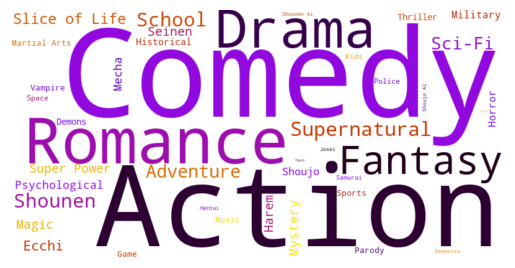

In [7]:
# reference : https://www.kaggle.com/indralin/try-content-based-and-collaborative-filtering

nonull_anime=anime_fulldata.copy()
nonull_anime.dropna(inplace=True)
from collections import defaultdict

all_genres = defaultdict(int)

for genres in nonull_anime['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1
        
from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

In [8]:
# User should rate atleast 400 animes
n_ratings = rating_data['user_id'].value_counts()
rating_data = rating_data[rating_data['user_id'].isin(n_ratings[n_ratings >= 400].index)].copy()
print('Users who rated more than 400 animes are :',len(rating_data))

Users who rated more than 400 animes are : 1945657


In [9]:
 
# Removing Duplicated Rows from the data

duplicates = rating_data.duplicated()
if duplicates.sum() > 0:
    print('> {} duplicates'.format(duplicates.sum()))
    rating_data = rating_data[~duplicates]

print('> {} duplicates'.format(rating_data.duplicated().sum()))

> 0 duplicates


Text(0, 0.5, 'User Rating count')

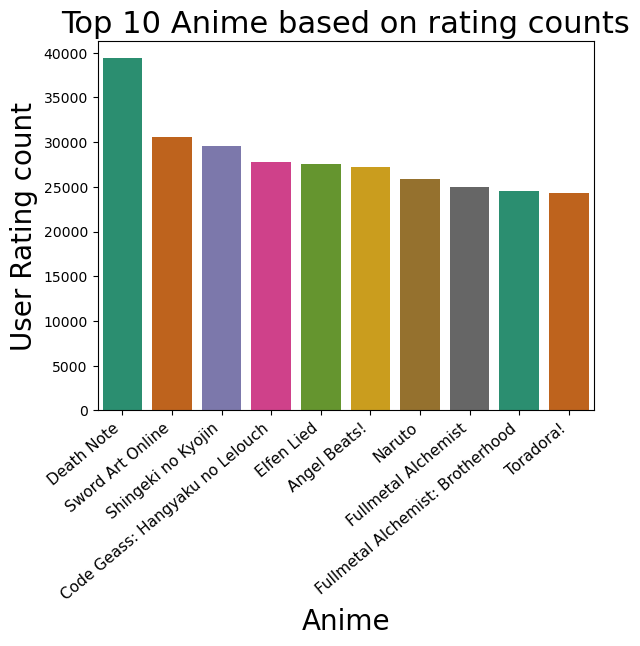

In [10]:
# Creating a dataframe for rating counts
combine_anime_rating = anime_fulldata.dropna(axis = 0, subset = ['anime_title'])
anime_ratingCount = (combine_anime_rating.
     groupby(by = ['anime_title'])['user_rating'].
     count().
     reset_index().rename(columns = {'rating': 'totalRatingCount'})
    [['anime_title', 'user_rating']]
    )

# Plotting the bar plot for top 10 anime as per rating 
top10_animerating=anime_ratingCount[['anime_title', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="user_rating", data=top10_animerating, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)


In [11]:
## Which anime has the highest ratings

anime_data[['name', 'rating', 'members', 'type']].sort_values(by='rating', ascending=False).query('members>500000')[:5]

,name,rating,members,type
1,Fullmetal Alchemist: Brotherhood,9.26,793665,TV
3,Steins;Gate,9.17,673572,TV
13,Code Geass: Hangyaku no Lelouch R2,8.98,572888,TV
19,Code Geass: Hangyaku no Lelouch,8.83,715151,TV
23,One Punch Man,8.82,552458,TV


In [12]:
## Highest rated anime movies

anime_data[anime_data['type'] == 'Movie'][['name', 'rating', 'members', 'type']].sort_values(by='rating', ascending=False).query('members>200000')[:5]

,name,rating,members,type
0,Kimi no Na wa.,9.37,200630,Movie
15,Sen to Chihiro no Kamikakushi,8.93,466254,Movie
18,Ookami Kodomo no Ame to Yuki,8.84,226193,Movie
24,Mononoke Hime,8.81,339556,Movie
25,Suzumiya Haruhi no Shoushitsu,8.81,240297,Movie


In [13]:
## Content based recommendation system

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

genres_str = anime_data['genre'].str.split(',').astype(str)

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 4), min_df=0)
tfidf_matrix = tfidf.fit_transform(genres_str)

tfidf_matrix.shape
# tfidf.get_feature_names()
(12017, 5569)
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(anime_data.index, index=anime_data['name'])

def genre_recommendations(title, similarity=False):
    
    if similarity == False:
        
        idx = indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]
        
        anime_indices = [i[0] for i in sim_scores]
        
        return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                             'Type': anime_data['type'].iloc[anime_indices].values})
    
    elif similarity == True:
        
        idx = indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]
        
        anime_indices = [i[0] for i in sim_scores]
        similarity_ = [i[1] for i in sim_scores]
        
        return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                             'similarity': similarity_,
                             'Type': anime_data['type'].iloc[anime_indices].values})

In [15]:
## Based on cosine similarity

In [16]:
tfidf_matrix.shape

(12294, 5603)

In [17]:
tfidf_matrix

<12294x5603 sparse matrix of type '<class 'numpy.float64'>'
	with 103367 stored elements in Compressed Sparse Row format>

In [18]:


indices = pd.Series(anime_data.index, index=anime_data['name'])

def genre_recommendations(title, highest_rating=False, similarity=False):
    
    if highest_rating == False:
        if similarity == False:
        
            idx = indices[title]
            sim_scores = list(enumerate(cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:11]
        
            anime_indices = [i[0] for i in sim_scores]
        
            return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Type': anime_data['type'].iloc[anime_indices].values})
    
        elif similarity == True:
        
            idx = indices[title]
            sim_scores = list(enumerate(cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:11]
        
            anime_indices = [i[0] for i in sim_scores]
            similarity_ = [i[1] for i in sim_scores]
        
            return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Similarity': similarity_,
                                 'Type': anime_data['type'].iloc[anime_indices].values})
        
    elif highest_rating == True:
        if similarity == False:
        
            idx = indices[title]
            sim_scores = list(enumerate(cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:11]
        
            anime_indices = [i[0] for i in sim_scores]
        
            result_df = pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Type': anime_data['type'].iloc[anime_indices].values,
                                 'Rating': anime_data['rating'].iloc[anime_indices].values})
            
            return result_df.sort_values('Rating', ascending=False)
    
        elif similarity == True:
        
            idx = indices[title]
            sim_scores = list(enumerate(cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:11]
        
            anime_indices = [i[0] for i in sim_scores]
            similarity_ = [i[1] for i in sim_scores]
        
            result_df = pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Similarity': similarity_,
                                 'Type': anime_data['type'].iloc[anime_indices].values,
                                 'Rating': anime_data['rating'].iloc[anime_indices].values})
            
            return result_df.sort_values('Rating', ascending=False)


In [22]:
genre_recommendations('Tokyo Ghoul', highest_rating=True, similarity=True)

,Anime name,Similarity,Type,Rating
1,Boku dake ga Inai Machi,0.663917,TV,8.65
2,Tokyo Ghoul: &quot;Pinto&quot;,0.659575,OVA,7.61
0,Tokyo Ghoul √A,1.000000,TV,7.52
5,Boogiepop wa Warawanai: Boogiepop Phantom,0.438129,TV,7.27
4,Night Head Genesis,0.527331,TV,6.88
9,Hello Harinezumi: Satsui no Ryoubun,0.359198,OVA,6.52
3,Mayoiga,0.621623,TV,5.80
6,Violence Jack: Jigoku Gai-hen,0.398535,OVA,5.80
7,Violence Jack: Hell&#039;s Wind-hen,0.398535,OVA,5.68
8,Violence Jack: Harlem Bomber-hen,0.398535,OVA,5.46
